In [1]:
pip install python-mnist

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from mnist import MNIST
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [8]:
data = MNIST('mnist_data')
images_train,labels_train = data.load_training()
images_test, labels_test = data.load_testing()

In [9]:
labels_train

array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4

In [24]:
images_train.shape

(60000, 784)

In [25]:
images_test.shape

(10000, 784)

In [10]:
len(labels_train)

60000

In [12]:
len(labels_test)

10000

In [14]:
images_train[0][28*10:28*11]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 1,
 154,
 253,
 90,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
labels_train[0]

5

In [17]:
labels_train = np.array(labels_train).reshape(-1,1)
# reshape the label to any number of rows with only one column
labels_test = np.array(labels_test).reshape(-1,1)

In [18]:
labels_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [19]:
labels_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [20]:
onehot = OneHotEncoder()
onehot.fit(labels_train)
# one hot encoder for train dataset
labels_train = onehot.transform(labels_train)
labels_test = onehot.transform(labels_test)
labels_train = labels_train.toarray()
labels_test = labels_test.toarray()

images_train = np.array(images_train).reshape(60000,784)
# 28*28 = 784
# flatten the data into 28 *28
images_test = np.array(images_test).reshape(10000,784)


images_train = (images_train-0)/ (255-0)
images_test = images_test/255


In [23]:
print(labels_train)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [22]:
print(labels_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


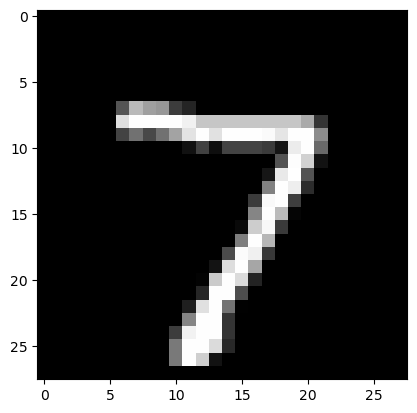

real label:  7


In [35]:
ind = 0
sample_image = images_test[ind]
sammple_image = np.array(sample_image, dtype= 'float')
pixels = sample_image.reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()
print('real label: ', np.argmax(labels_test[ind]))

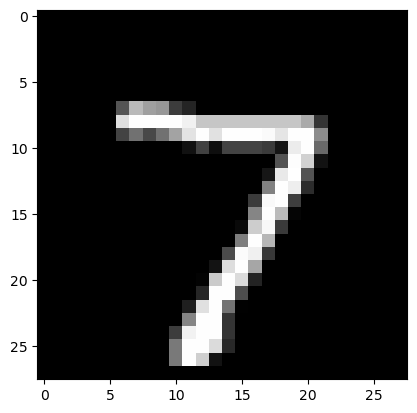

In [36]:
plt.imshow(images_test[0].reshape((28,28)),cmap='gray')
plt.show()

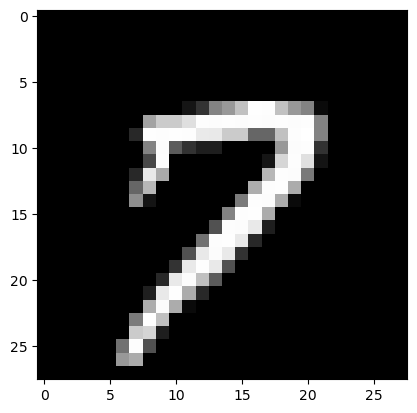

real label:  7


In [38]:
ind = 599
sample_image = images_train[ind]
sammple_image = np.array(sample_image, dtype= 'float')
pixels = sample_image.reshape((28,28))
plt.imshow(pixels, cmap = 'gray')
plt.show()
print('real label: ', np.argmax(labels_train[ind]))

In [39]:
len(sample_image)

784

In [40]:
pixels.shape

(28, 28)

In [57]:
def weight_variable(shape):
    initial = tf.random.truncated_normal(shape, stddev= 0.1, mean=0.0)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.random.truncated_normal(shape, stddev = 0.1, mean=0.0)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides= [1,1,1,1], padding="SAME" )
# strides contain values of N,H,W,C where H is height, W is width, C is channel and N is serail of strides    

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding= "SAME")


In [43]:
# applying filter of 5x5x1 of 32 numbers
# that means applying 32 filter of size 5x5x1 in first convolution and bias of 32
w_conv1 = tf.Variable(tf.random.truncated_normal([5,5,1,32]))
b_conv1 = tf.Variable(tf.random.truncated_normal([32]))


# applying 64 filters of size 5x5x32 in second convoluton and bias of 64
w_conv2 = tf.Variable(tf.random.truncated_normal([5,5,32,64]))
b_conv2 = tf.Variable(tf.random.truncated_normal([64]))


#calculating fully connect weights

w_fc1 = tf.Variable(tf.random.truncated_normal([7*7*64, 1024]))
b_fc1 = tf.Variable(tf.random.truncated_normal([1024]))

# dropout regularisation
keep_prop = tf.constant(0.2,'float32')

# 2 hidden in FNN
# Image output hase row value of 1024 input values i.e x1.....x1024
# xi is multiplied with w_fc1 to get out of 200 rows/ classes 
# This 200 values are multiplied with weights and biases to get output of 10 class
w_fc2 = tf.Variable(tf.random.truncated_normal([1024, 200]))
b_fc2 = tf.Variable(tf.random.truncated_normal([200])) 



w_fc3 = tf.Variable(tf.random.truncated_normal([200, 10]))
b_fc3 = tf.Variable(tf.random.truncated_normal([10]))




In [59]:
def model(x,keep_prop):
    x_image = tf.cast(tf.reshape(x,[-1,28,28,1]),'float32')
    
    h_conv1 = tf.nn.relu(conv2d(x_image,w_conv1) + b_conv1  )
    ## output image has 28x28x32 because the padding is same
    h_pool1 = max_pool_2x2(h_conv1)
    ## output image has 14x14x32
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1,w_conv2) + b_conv2  )
    ## output image has size of 14x14x64
    h_pool2 = max_pool_2x2(h_conv2)
    # output image is pooling to 7x7x64
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1 ) 
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prop)
    
    h_fc2 = tf.nn.tanh(tf.matmul(h_fc1, w_fc2) + b_fc2 ) 
    # activation function is hyperbolic tangent because the output should contain -1 to 1
    h_fc2_drop = tf.nn.dropout(h_fc2, keep_prop)
    
    y_conv_logits = tf.matmul(h_fc2_drop, w_fc3) + b_fc3
    
    return y_conv_logits
    
    

In [50]:
def cross_entropy(y_true,y_predict):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y_predict)
   # calculating cross entrpy loss with actual value(labels) and predicted value(logits) 
    return tf.reduce_mean(loss)

def accuracy(y_true,y_predict):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype = tf.int32)
    predict = tf.cast(tf.argmax(y_predict, axis=1), dtype = tf.int32)
    predict = tf.equal(y_true,predict)
    
    return tf.reduce_mean(tf.cast(predict, dtype = tf.float32))


def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype = tf.int32).numpy()
    y_predict = tf.nn.softmax(logistic_regression(x)[:,1])
    return (roc_auc_score(y_true,y_predict))

def grad(x,y):
    with tf.GradientTape() as tape:
        y_predict = model(x,keep_prop)
        loss_value = cross_entropy(y,y_predict)
    return tape.gradient(loss_value, [w_conv1, b_conv1, w_conv2, b_conv2, w_fc1, b_fc1, w_fc2, b_fc2, w_fc3, b_fc3])

# predicting with input image and calculating the loss  and finally
# returning the gradient descents loss value, weights and biases


In [53]:
epochs = 1000

In [ ]:
learning_rate= 0.01
for epoch in range(epochs):
    print(epoch)
    # taking 10 samples of each batch from 60000 images
    rand_int = np.random.choice(range(60000),10)
    # taking all column values of those samples number in the batch
    x_train_batch = images_train[rand_int]
    # taking y as label value corresponding to the sample number in the batch
    y_train_batch = labels_train[rand_int]
    
    # calculating differentiation of weights and biases i.e delta weight
    dw_conv1, db_conv1, dw_conv2, db_conv2, dw_fc1, db_fc1, dw_fc2, db_fc2, dw_fc3, db_fc3 = grad(x_train_batch, tf.cast(y_train_batch, 'float32'))
    
    # updating the weights by doing gradient descent
    # i.e new weight = old weight - learning rate* delta_weight 
    # lly new_bias = old_bias - learning_rate * delta_bias
    
    w_conv1.assign_sub(learning_rate*dw_conv1)
    w_conv2.assign_sub(learning_rate*dw_conv2)
    w_fc1.assign_sub(learning_rate*dw_fc1)
    w_fc2.assign_sub(learning_rate*dw_fc2)
    w_fc3.assign_sub(learning_rate*dw_fc3)
    
    b_conv1.assign_sub(learning_rate*db_conv1)
    b_conv2.assign_sub(learning_rate*db_conv2)
    b_fc1.assign_sub(learning_rate*db_fc1)
    b_fc2.assign_sub(learning_rate*db_fc2)
    b_fc3.assign_sub(learning_rate*db_fc3)
    
    # for every 50 epoch print the result of accuracy and cross entropy
    
    if epoch%50 == 0:
        # predict the test value with hidden layers and result the o/p as y_predict
        test_predict = model(images_test, tf.constant(0.0,'float32'))
        # calculate the  loss or accuracy by comparing the predicted and actual value
        acc_test = accuracy(labels_test, test_predict).numpy()
        loss_test = cross_entropy(labels_test, test_predict).numpy()
        
        # predict the train set and calculate the accuracy
        
        train_predict = model(images_train, tf.constant(0.0,'float32'))
        acc_train = accuracy(labels_train, train_predict).numpy()
        loss_train = cross_entropy(labels_train, train_predict).numpy()
        
        print(f'Train Accuracy = {acc_train} and Test Accuracy = {acc_test} \n Train_loss : {loss_train} and Test_loss : {loss_test} ')
    
    
    
    

0
Train Accuracy = 0.11084999889135361 and Test Accuracy = 0.11860000342130661 
 Train_loss : 14.696895599365234 and Test_loss : 14.544137954711914 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Train Accuracy = 0.1632833331823349 and Test Accuracy = 0.16249999403953552 
 Train_loss : 8.499724388122559 and Test_loss : 8.483848571777344 
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Train Accuracy = 0.1690666675567627 and Test Accuracy = 0.16439999639987946 
 Train_loss : 4.03122615814209 and Test_loss : 3.9760875701904297 
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
